In [26]:
import pandas as pd
import re

In [27]:
df = pd.read_csv("data/world_bank_data.csv")

In [28]:
gdp_investment_lending_rows = df[df['Indicator Name'].str.contains(
    'GDP|investment|lending|credit', case=False, na=False)]

gdp_investment_lending_rows.to_csv("data/filtered_data.csv")

In [29]:
relevant_categories = [
    'TX.VAL.TECH.MF.ZS',  # High-technology exports (% of manufactured exports)
    'NY.GDP.MKTP.KD.ZG',  # GDP growth (annual %)
    'FS.AST.PRVT.GD.ZS',  # Domestic credit to private sector (% of GDP)
    'GC.DOD.TOTL.GD.ZS',  # Central government debt, total (% of GDP)
    'SE.XPD.TOTL.GD.ZS',  # Government expenditure on education, total (% of GDP)
    'GB.XPD.RSDV.GD.ZS',  # Research and development expenditure (% of GDP)
    'BX.KLT.DINV.WD.GD.ZS',  # Net inflows of foreign direct investment (% of GDP)
    'FB.AST.NPER.ZS',  # Bank nonperforming loans to total gross loans (%)
    'FP.CPI.TOTL.ZG'   # Inflation, consumer prices (annual %)
]

# Create a new dataframe with only the relevant categories
relevant_df = df[df["Indicator Code"].isin(relevant_categories)]
relevant_df
relevant_df.to_csv("data/relevant_data.csv")

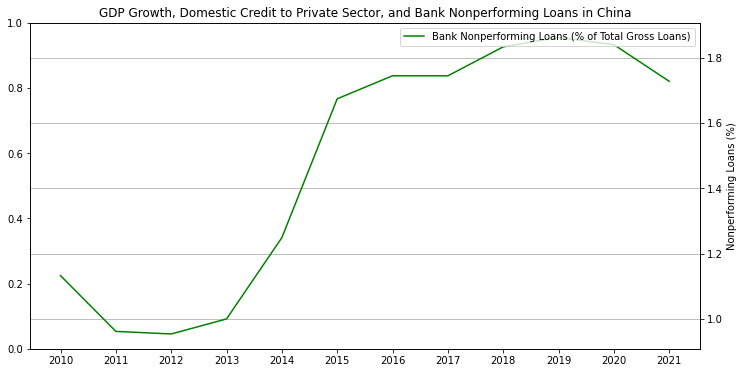

In [30]:
import matplotlib.pyplot as plt
# Extracting years for the plot
years = relevant_df.columns[4:-1]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis for GDP growth and Domestic credit to private sector
# ax1.plot(years, relevant_df[relevant_df['Indicator Code'] == 'NY.GDP.MKTP.KD.ZG'].iloc[0][4:-1], color='blue', label='GDP Growth (annual %)')
# ax1.plot(years, relevant_df[relevant_df['Indicator Code'] == 'FS.AST.PRVT.GD.ZS'].iloc[0][4:-1], color='red', label='Domestic Credit to Private Sector (% of GDP)')
# ax1.set_xlabel('Year')
# ax1.set_ylabel('Percentage (%)')
# ax1.tick_params(axis='y')
# ax1.legend(loc='upper left')

# Second axis for Bank nonperforming loans
ax2 = ax1.twinx()
ax2.plot(years, relevant_df[relevant_df['Indicator Code'] == 'FB.AST.NPER.ZS'].iloc[0][4:-1], color='green', label='Bank Nonperforming Loans (% of Total Gross Loans)')
ax2.set_ylabel('Nonperforming Loans (%)')
ax2.tick_params(axis='y')
ax2.legend(loc='upper right')

plt.title('GDP Growth, Domestic Credit to Private Sector, and Bank Nonperforming Loans in China')
plt.grid(True)
plt.show()
